In [2]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.tsa.stattools import adfuller

In [3]:
day_n2 = pd.read_csv('./data/prices_round_1_day_-2.csv', sep=';')
day_n1 = pd.read_csv('./data/prices_round_1_day_-1.csv', sep=';')
day_0 = pd.read_csv('./data/prices_round_1_day_0.csv', sep=';')
day_n2.head()

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,-2,0,BANANAS,4997,26,NaN,NaN,NaN,NaN,5003,26,NaN,NaN,NaN,NaN,5000.0,0.000000
1,-2,0,PEARLS,9996,1,9995.0,25.0,NaN,NaN,10004,1,10005.0,25.0,NaN,NaN,10000.0,0.000000
2,-2,100,BANANAS,4997,20,NaN,NaN,NaN,NaN,4998,1,5004.0,20.0,NaN,NaN,4997.5,2.863281
3,-2,100,PEARLS,10000,5,9995.0,20.0,NaN,NaN,10005,20,NaN,NaN,NaN,NaN,10002.5,-8.000000
4,-2,200,PEARLS,9996,1,9995.0,30.0,NaN,NaN,10004,1,10005.0,30.0,NaN,NaN,10000.0,-8.000000


In [4]:
dn2_b = day_n2[day_n2['product'] == 'BANANAS']
dn1_b = day_n1[day_n1['product'] == 'BANANAS']
d0_b = day_0[day_0['product'] == 'BANANAS']
dn2_b

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,-2,0,BANANAS,4997,26,NaN,NaN,NaN,NaN,5003,26,NaN,NaN,NaN,NaN,5000.0,0.000000
2,-2,100,BANANAS,4997,20,NaN,NaN,NaN,NaN,4998,1,5004.0,20.0,NaN,NaN,4997.5,2.863281
5,-2,200,BANANAS,4997,31,NaN,NaN,NaN,NaN,5004,31,NaN,NaN,NaN,NaN,5000.5,2.536621
7,-2,300,BANANAS,4997,27,NaN,NaN,NaN,NaN,5004,27,NaN,NaN,NaN,NaN,5000.5,2.405762
9,-2,400,BANANAS,4997,20,NaN,NaN,NaN,NaN,5002,9,5004.0,20.0,NaN,NaN,4999.5,2.925781
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19990,-2,999500,BANANAS,4944,26,NaN,NaN,NaN,NaN,4951,26,NaN,NaN,NaN,NaN,4947.5,223680.000000
19992,-2,999600,BANANAS,4946,6,4945.0,30.0,NaN,NaN,4952,30,NaN,NaN,NaN,NaN,4949.0,219260.000000
19994,-2,999700,BANANAS,4945,22,NaN,NaN,NaN,NaN,4952,22,NaN,NaN,NaN,NaN,4948.5,214296.000000
19996,-2,999800,BANANAS,4946,26,NaN,NaN,NaN,NaN,4950,9,4952.0,26.0,NaN,NaN,4948.0,213364.000000


In [5]:
log_ret = np.log(dn2_b['mid_price'] / dn2_b['mid_price'].shift(1))
log_ret

0             NaN
2       -0.000500
5        0.000600
7        0.000000
9       -0.000200
           ...   
19990   -0.000707
19992    0.000303
19994   -0.000101
19996   -0.000101
19999    0.000101
Name: mid_price, Length: 10000, dtype: float64

In [6]:
res = adfuller(log_ret[1:])
print(f'ADF Statistic: {res[0]}')
print(f'p-value: {res[1]}')
res

ADF Statistic: -40.00142021520785
p-value: 0.0


(-40.00142021520785,
 0.0,
 10,
 9988,
 {'1%': -3.4310048840021,
  '5%': -2.861829419734687,
  '10%': -2.5669240529873334},
 -134930.76113755838)

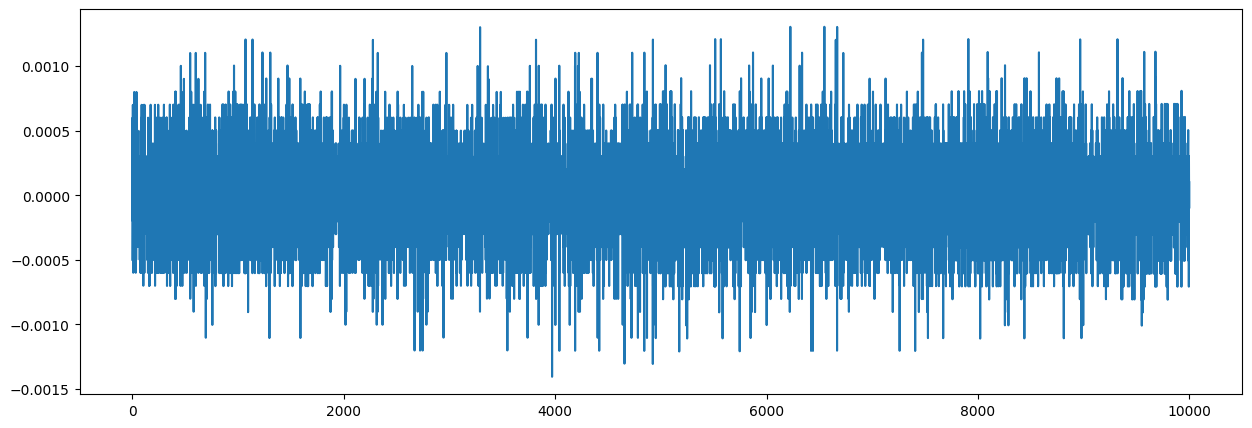

In [7]:
x = np.arange(0, len(log_ret) - 1)
plt.figure(figsize=(15, 5))
plt.plot(x, log_ret[1:])
plt.show()

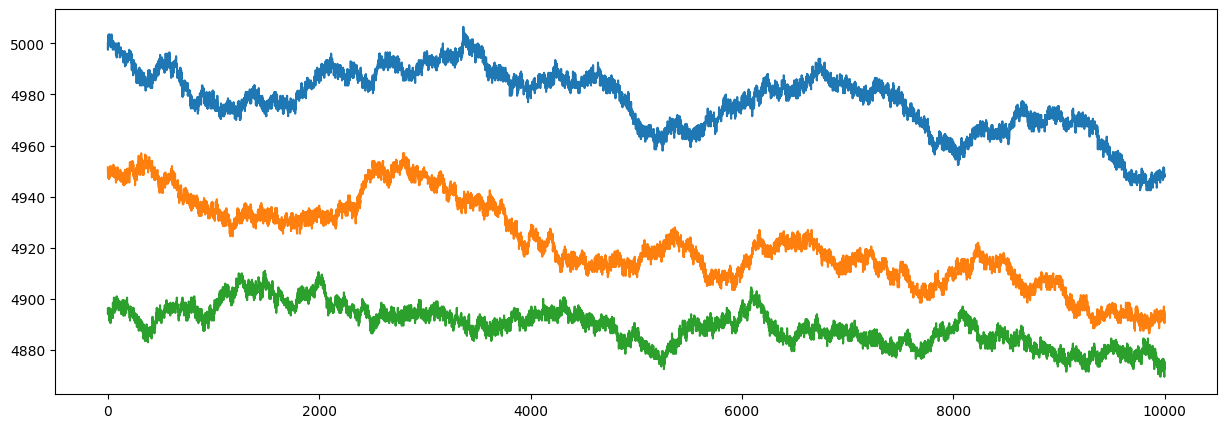

In [8]:
plt.figure(figsize=(15, 5))
plt.plot(np.arange(0, len(dn2_b['mid_price'])), dn2_b['mid_price'])
plt.plot(np.arange(0, len(dn1_b['mid_price'])), dn1_b['mid_price'])
plt.plot(np.arange(0, len(d0_b['mid_price'])), d0_b['mid_price'])

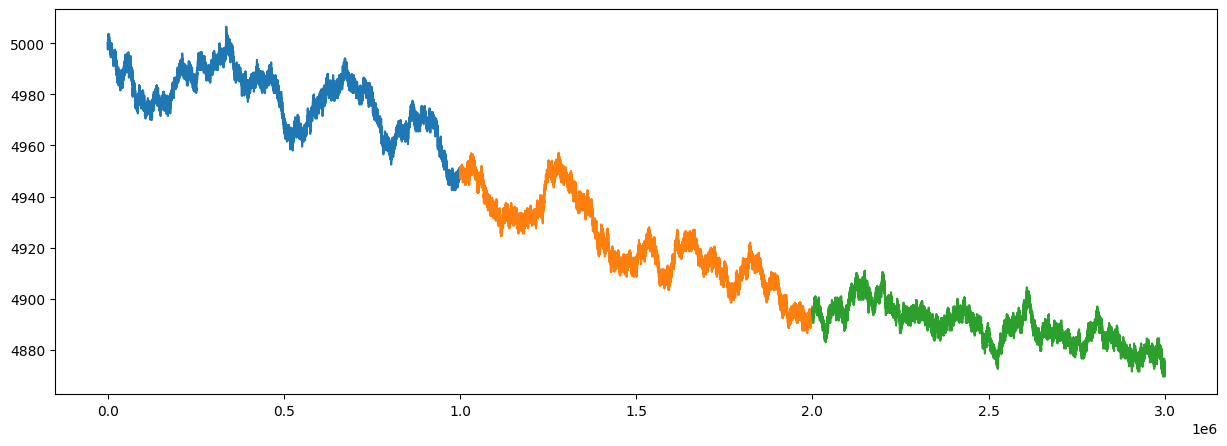

In [9]:
plt.figure(figsize=(15, 5))
plt.plot(np.arange(0, 1000000, 100), dn2_b['mid_price'])
plt.plot(np.arange(1000000, 2000000, 100), dn1_b['mid_price'])
plt.plot(np.arange(2000000, 3000000, 100), d0_b['mid_price'])

In [10]:
bananas = np.concatenate((dn2_b['mid_price'], dn1_b['mid_price'], d0_b['mid_price']))
bananas

array([5000. , 4997.5, 5000.5, ..., 4875.5, 4872.5, 4873. ])

In [11]:
reg = stats.linregress(np.arange(0, 3000000, 100), bananas)
print(f'R^2: {reg.rvalue**2:.6f}')
print(f'Intercept stderr: {reg.intercept_stderr}')

R^2: 0.928907
Intercept stderr: 0.11894678005576412


In [12]:
print(reg.slope)
print(reg.intercept)

-4.2995478433328285e-05
4994.36921787607


106.11075483490947


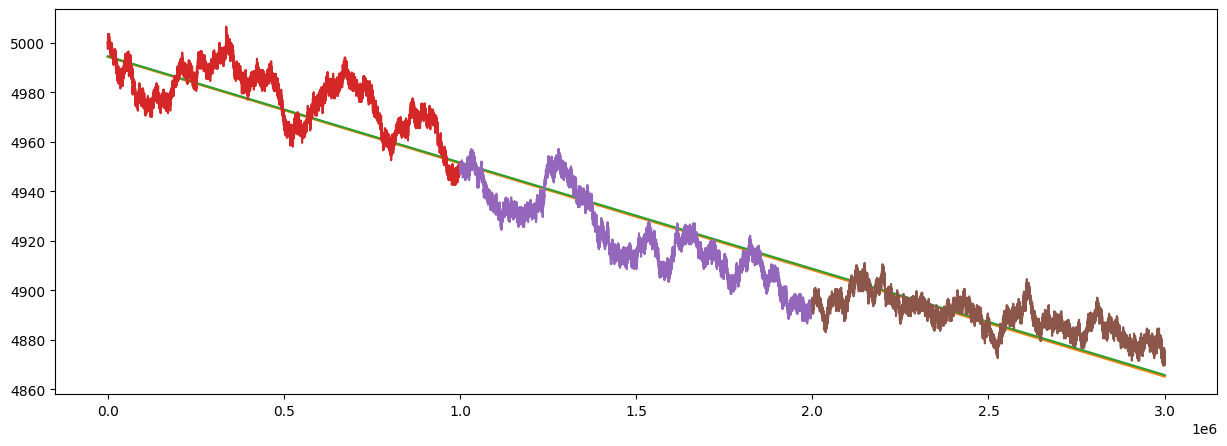

In [13]:
plt.figure(figsize=(15, 5))
x = np.arange(0, 3000000, 1)
p_lin = reg.intercept + reg.slope * np.arange(0, 3000000, 100)
mse = np.sum(np.power(p_lin - bananas, 2)) / 30000

print(mse)
plt.plot(x, reg.intercept + reg.slope * x)
plt.plot(x, reg.intercept - reg.intercept_stderr + (reg.slope - reg.stderr) * x)
plt.plot(x, reg.intercept + reg.intercept_stderr + (reg.slope + reg.stderr) * x)
plt.plot(np.arange(0, 1000000, 100), dn2_b['mid_price'])
plt.plot(np.arange(1000000, 2000000, 100), dn1_b['mid_price'])
plt.plot(np.arange(2000000, 3000000, 100), d0_b['mid_price'])

In [14]:
fit = np.polyfit(np.arange(0, 3000000, 100), np.log(bananas), 1)
print(fit)

[-8.71455979e-09  8.51611030e+00]


105.0491645253676


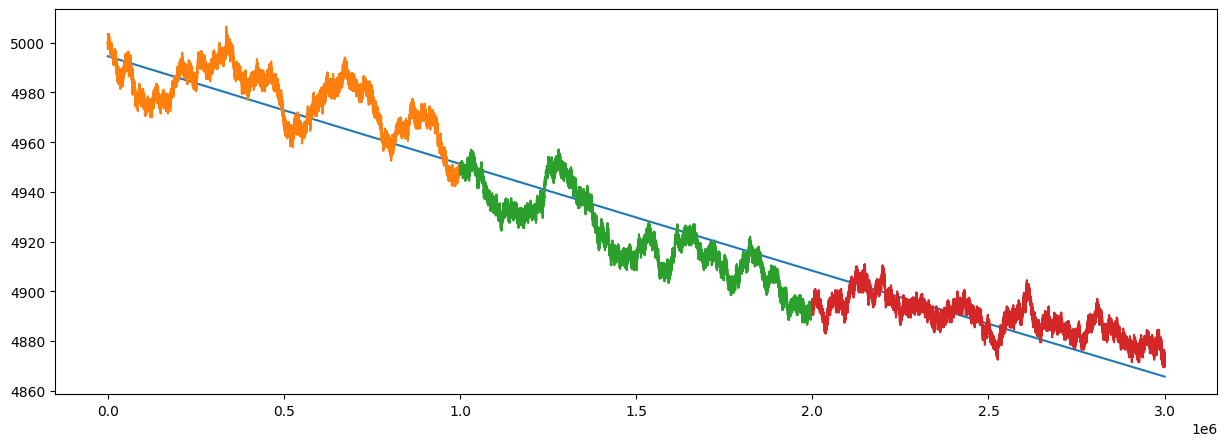

In [15]:
pred = math.e**(fit[1] + fit[0] * x)
pred_e = math.e**(fit[1] + fit[0] * np.arange(0, 3000000, 100))

mse = np.sum(np.power(pred_e - bananas, 2))

print(mse / 30000)

plt.figure(figsize=(15, 5))
plt.plot(x, pred)
plt.plot(np.arange(0, 1000000, 100), dn2_b['mid_price'])
plt.plot(np.arange(1000000, 2000000, 100), dn1_b['mid_price'])
plt.plot(np.arange(2000000, 3000000, 100), d0_b['mid_price'])

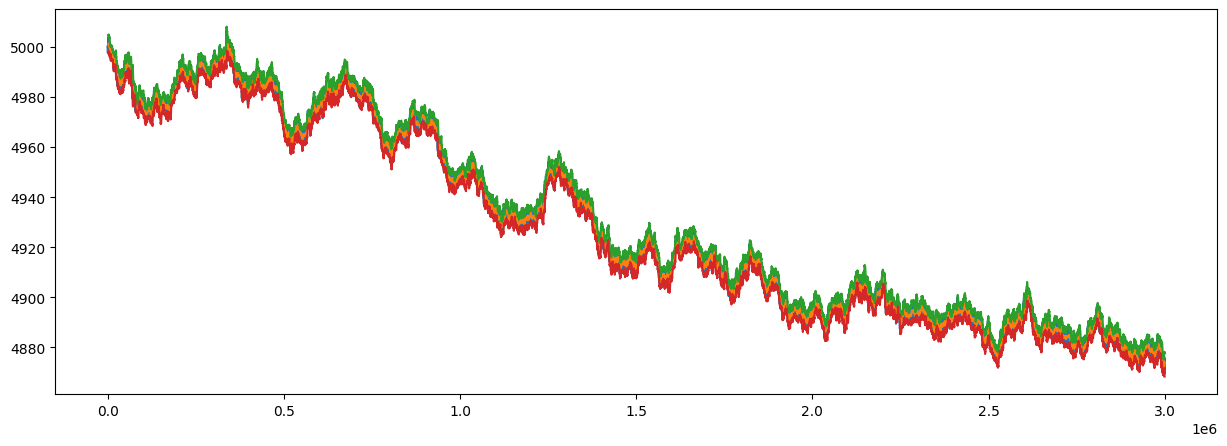

In [16]:
df = pd.DataFrame(bananas, columns=['mid_price'])

def get_sma(prices, rate):
    return prices.rolling(rate).mean()

def get_std(prices, rate):
    return prices.rolling(rate).std()

rate = 20
m = 2.5 # of std devs
start = 0
end = 30000
xi = np.arange(start * 100, end * 100, 100)

sma = get_sma(df['mid_price'], rate)
std = get_std(df['mid_price'], rate)

plt.figure(figsize=(15,5))
plt.plot(xi, bananas[start:end])
plt.plot(xi, (sma)[start:end])
plt.plot(xi, (sma + m * std)[start:end])
plt.plot(xi, (sma - m * std)[start:end])
plt.show()

In [17]:
lower = sma - 2 * std


np.nanmin(lower[0:2500])

4969.508821609252

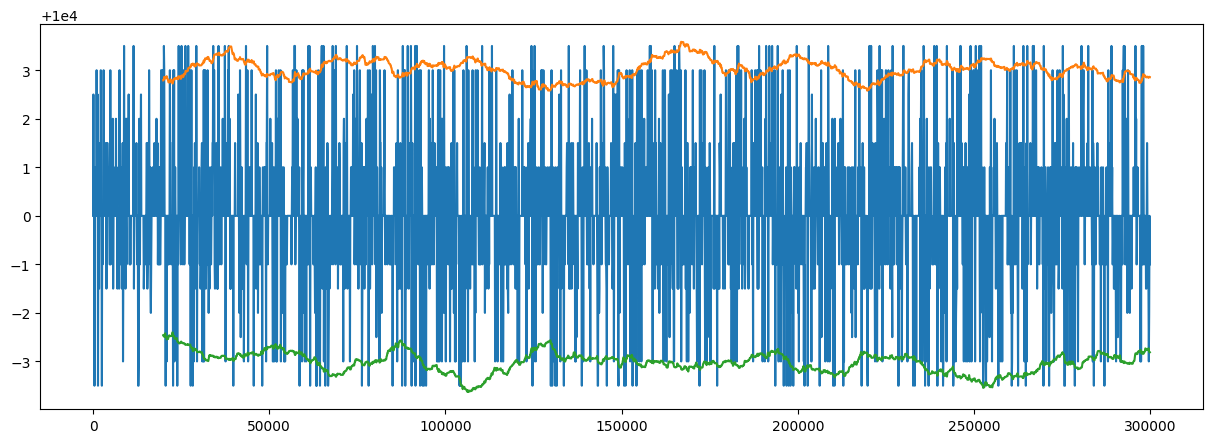

In [18]:
dn2_p = day_n2[day_n2['product'] == 'PEARLS']
dn1_p = day_n1[day_n1['product'] == 'PEARLS']
d0_p = day_0[day_0['product'] == 'PEARLS']
pearls = np.concatenate((dn2_p['mid_price'], dn1_p['mid_price'], d0_p['mid_price']))

pdf = pd.DataFrame(pearls, columns=['mid_price'])

rate = 200
m = 2 # of std devs

sma = get_sma(pdf['mid_price'], rate)
std = get_std(pdf['mid_price'], rate)

start = 0
end = 3000
xi = np.arange(start * 100, end * 100, 100)

plt.figure(figsize=(15, 5))
plt.plot(xi, pearls[start:end])
plt.plot(xi, (sma + m * std)[start:end])
plt.plot(xi, (sma - m * std)[start:end])
plt.show()

In [19]:
def least_squares(x, y):
    if np.linalg.det(x.T @ x) != 0:
        return np.linalg.inv((x.T @ x)) @ (x.T @ y)
    return np.linalg.pinv((x.T @ x)) @ (x.T @ y) 
"""
Autoregressor
"""
def ar_process(eps, phi):
    """
    Creates a AR process with a zero mean.
    """
    # Reverse the order of phi and add a 1 for current eps_t
    phi = np.r_[1, phi][::-1]
    ar = eps.copy()
    offset = len(phi)
    for i in range(offset, ar.shape[0]):
        ar[i - 1] = ar[i - offset: i] @ phi
    return ar


"""
Moving Average 
"""
n = 500
eps = np.random.normal(size=n)

def lag_view(x, order):
    """
    For every value X_i create a row that lags k values: [X_i-1, X_i-2, ... X_i-k]
    """
    y = x.copy()
    # Create features by shifting the window of `order` size by one step.
    # This results in a 2D array [[t1, t2, t3], [t2, t3, t4], ... [t_k-2, t_k-1, t_k]]
    x = np.array([y[-(i + order):][:order] for i in range(y.shape[0])])

    # Reverse the array as we started at the end and remove duplicates.
    # Note that we truncate the features [order -1:] and the labels [order]
    # This is the shifting of the features with one time step compared to the labels
    x = np.stack(x)[::-1][order - 1: -1]
    y = y[order:]

    return x, y

def ma_process(eps, theta):
    """
    Creates an MA(q) process with a zero mean (mean not included in implementation).
    :param eps: (array) White noise signal.
    :param theta: (array/ list) Parameters of the process.
    """
    # reverse the order of theta as Xt, Xt-1, Xt-k in an array is Xt-k, Xt-1, Xt.
    theta = np.array([1] + list(theta))[::-1][:, None]
    eps_q, _ = lag_view(eps, len(theta))
    return eps_q @ theta


"""
Differencing 
"""
def difference(x, d=1):
    if d == 0:
        return x
    else:
        x = np.r_[x[0], np.diff(x)]
        return difference(x, d - 1)

def undo_difference(x, d=1):
    if d == 1:
        return np.cumsum(x)
    else:
        x = np.cumsum(x)
        return undo_difference(x, d - 1)


"""
Linear Regression
"""
class LinearModel:
    def __init__(self, fit_intercept=True):
        self.fit_intercept = fit_intercept
        self.beta = None
        self.intercept_ = None
        self.coef_ = None

    def _prepare_features(self, x):
        if self.fit_intercept:
            x = np.hstack((np.ones((x.shape[0], 1)), x))
        return x

    def fit(self, x, y):
        x = self._prepare_features(x)
        self.beta = least_squares(x, y)
        if self.fit_intercept:
            self.intercept_ = self.beta[0]
            self.coef_ = self.beta[1:]
        else:
            self.coef_ = self.beta

    def predict(self, x):
        x = self._prepare_features(x)
        return x @ self.beta

    def fit_predict(self, x, y):
        self.fit(x, y)
        return self.predict(x)


"""
ARIMA Model 
"""
class ARIMA(LinearModel):
    def __init__(self, q, d, p):
        """
        An ARIMA model.
        :param q: (int) Order of the MA model.
        :param p: (int) Order of the AR model.
        :param d: (int) Number of times the data needs to be differenced.
        """
        super().__init__(True)
        self.p = p
        self.d = d
        self.q = q
        self.ar = None
        self.resid = None

    def prepare_features(self, x):
        if self.d > 0:
            x = difference(x, self.d)

        ar_features = None
        ma_features = None

        # Determine the features and the epsilon terms for the MA process
        if self.q > 0:
            if self.ar is None:
                self.ar = ARIMA(0, 0, self.p)
                self.ar.fit_predict(x)
            eps = self.ar.resid
            eps[0] = 0

            # prepend with zeros as there are no residuals_t-k in the first X_t
            ma_features, _ = lag_view(np.r_[np.zeros(self.q), eps], self.q)

        # Determine the features for the AR process
        if self.p > 0:
            # prepend with zeros as there are no X_t-k in the first X_t
            ar_features = lag_view(np.r_[np.zeros(self.p), x], self.p)[0]

        if ar_features is not None and ma_features is not None:
            n = min(len(ar_features), len(ma_features))
            ar_features = ar_features[:n]
            ma_features = ma_features[:n]
            features = np.hstack((ar_features, ma_features))
        elif ma_features is not None:
            n = len(ma_features)
            features = ma_features[:n]
        else:
            n = len(ar_features)
            features = ar_features[:n]

        return features, x[:n]

    def fit(self, x):
        features, x = self.prepare_features(x)
        super().fit(features, x)
        return features

    def fit_predict(self, x):
        """
        Fit and transform input
        :param x: (array) with time series.
        """
        features = self.fit(x)
        return self.predict(x, prepared=(features))

    def predict(self, x, **kwargs):
        """
        :param x: (array)
        :kwargs:
            prepared: (tpl) containing the features, eps and x
        """
        features = kwargs.get('prepared', None)
        if features is None:
            features, x = self.prepare_features(x)

        y = super().predict(features)
        self.resid = x - y

        return self.return_output(y)

    def return_output(self, x):
        if self.d > 0:
            x = undo_difference(x, self.d)
        return x

    def forecast(self, x, n):
        """
        Forecast the time series.
        :param x: (array) Current time steps.
        :param n: (int) Number of time steps in the future.
        """
        features, x = self.prepare_features(x)
        y = super().predict(features)

        # Append n time steps as zeros. Because the epsilon terms are unknown
        y = np.r_[y, np.zeros(n)]
        for i in range(n):
            feat = np.r_[y[-(self.p + n) + i: -n + i], np.zeros(self.q)]
            y[x.shape[0] + i] = super().predict(feat[None, :])
        return self.return_output(y)

In [36]:
model = ARIMA(4, 0, 1)
pred = model.fit_predict(bananas)
forecasted_price = []

for i in range(20, 30000):
    pred = model.fit_predict(bananas[i-20:i])
    forecast = model.forecast(pred, 1)[-1]
    forecasted_price.append(forecast)


In [41]:
df = pd.DataFrame(forecasted_price)
df.to_csv('aweoifjaoweifj.csv')

In [42]:
print(len(forecasted_price))

29980


30000
0.09798479314687092


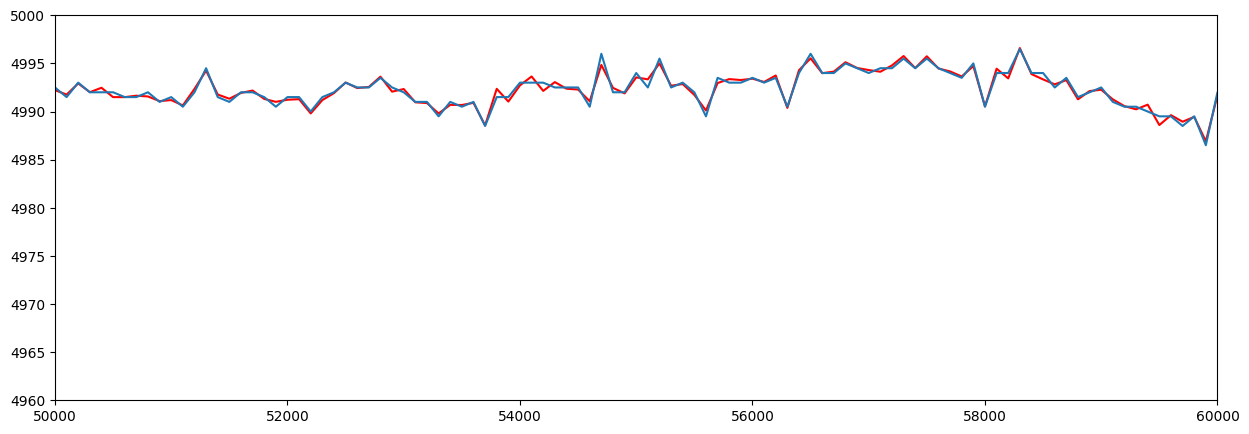

In [69]:
plt.figure(figsize=(15, 5))

new_forecast = np.concatenate((bananas[0:20], forecasted_price))
print(len(new_forecast))

mse = np.sum(np.power(new_forecast[19:] - bananas[:-19], 2))
print(mse / 29981)

plt.plot(np.arange(-1900, 2998100, 100), new_forecast, c='red')
plt.plot(np.arange(0, 3000000, 100), bananas)
plt.xlim(50000, 60000)
plt.ylim(4960, 5000)
plt.show()

In [4]:
results = pd.read_csv('./data/results.csv', sep=';')
results.tail(10)

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
19990,1,999500,PEARLS,9998,2,9996.0,1.0,9995.0,24.0,10004,1,10005.0,24.0,NaN,NaN,10001.0,14712.000000
19991,1,999500,BANANAS,4821,25,NaN,NaN,NaN,NaN,4822,1,4827.0,25.0,NaN,NaN,4821.5,-601.710938
19992,1,999600,PEARLS,9995,24,NaN,NaN,NaN,NaN,10005,24,NaN,NaN,NaN,NaN,10000.0,14712.000000
19993,1,999600,BANANAS,4820,24,NaN,NaN,NaN,NaN,4823,3,4827.0,24.0,NaN,NaN,4821.5,-595.906250
19994,1,999700,BANANAS,4820,30,NaN,NaN,NaN,NaN,4821,1,4825.0,7.0,4827.0,30.0,4820.5,-591.171875
19995,1,999700,PEARLS,9996,1,9995.0,29.0,NaN,NaN,10002,7,10004.0,1.0,10005.0,29.0,9999.0,14712.000000
19996,1,999800,BANANAS,4821,2,4820.0,22.0,NaN,NaN,4827,24,NaN,NaN,NaN,NaN,4824.0,-595.984375
19997,1,999800,PEARLS,9996,2,9995.0,22.0,NaN,NaN,10004,2,10005.0,22.0,NaN,NaN,10000.0,14712.000000
19998,1,999900,BANANAS,4820,20,NaN,NaN,NaN,NaN,4827,20,NaN,NaN,NaN,NaN,4823.5,-590.085938
19999,1,999900,PEARLS,9995,20,NaN,NaN,NaN,NaN,10005,20,NaN,NaN,NaN,NaN,10000.0,14712.000000


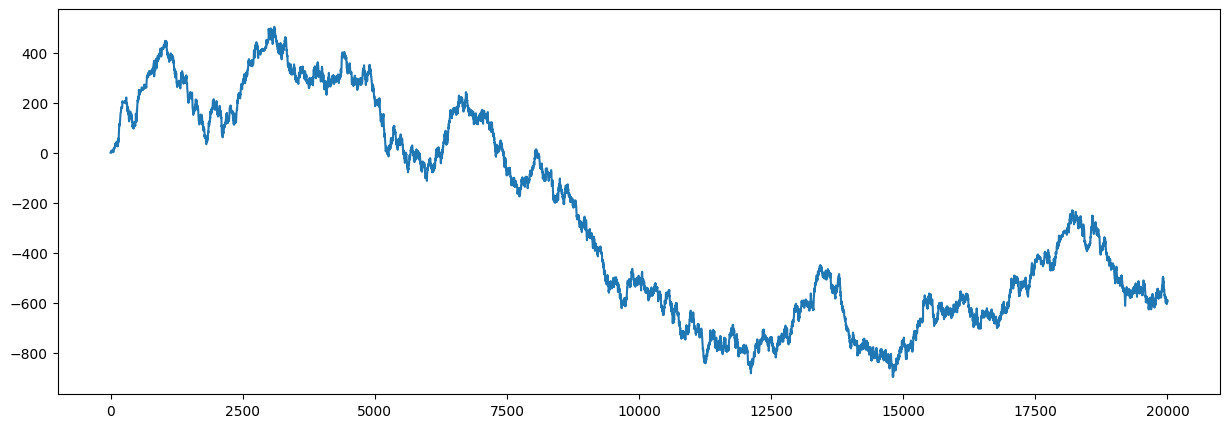

In [5]:
b_res = results[results['product'] == 'BANANAS']['profit_and_loss']
plt.figure(figsize=(15, 5))
plt.plot(b_res)

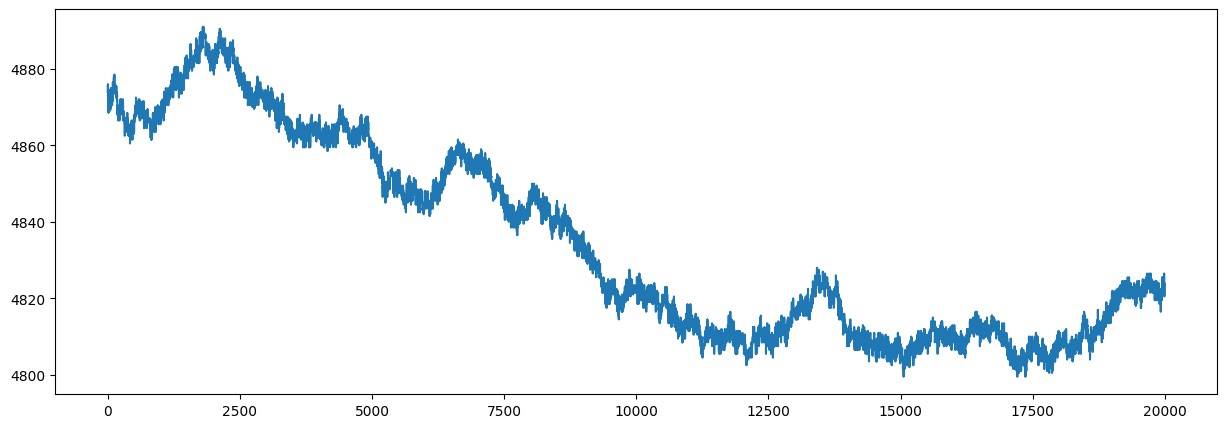

In [6]:
b_mid = results[results['product'] == 'BANANAS']['mid_price']
plt.figure(figsize=(15, 5))
plt.plot(b_mid)